In [101]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import joblib
import seaborn as sns


In [102]:
data = pd.read_csv("salary_data.csv")
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,60,Male,Master's,Marketing Manager,1,61200
1,50,Female,Bachelor's,Data Analyst,39,82900
2,36,Male,Bachelor's,Software Engineer,17,60400
3,64,Female,Master's,Marketing Manager,3,63600
4,29,Male,Master's,Marketing Manager,7,68400


In [103]:
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6882 entries, 0 to 6881
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  6882 non-null   int64 
 1   Gender               6882 non-null   object
 2   Education Level      6882 non-null   object
 3   Job Title            6882 non-null   object
 4   Years of Experience  6882 non-null   int64 
 5   Salary               6882 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 322.7+ KB


In [104]:
data.shape

(6882, 6)

In [105]:

# Label encode Gender
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# One-hot encode Education Level and Job Title
data = pd.get_dummies(data, columns=['Education Level', 'Job Title'])


In [106]:

# Standardize Age and Years of Experience
scaler = StandardScaler()
data[['Age', 'Years of Experience']] = scaler.fit_transform(data[['Age', 'Years of Experience']])


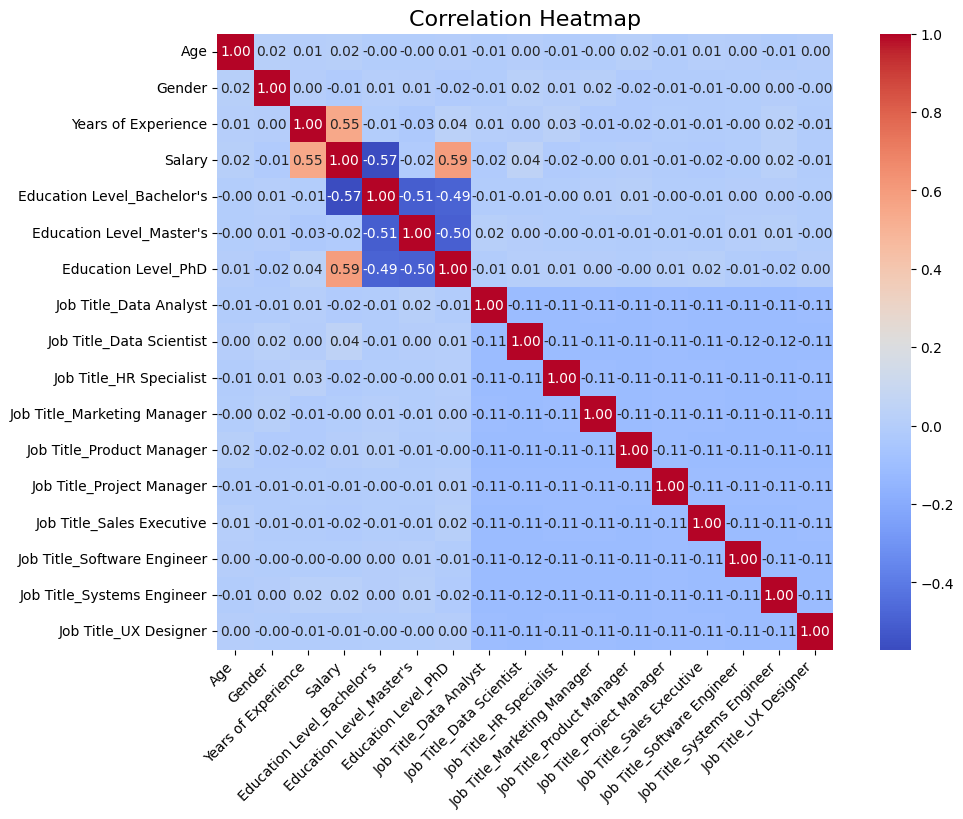

In [107]:

# Generate the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


In [108]:
data.describe()

,Age,Gender,Years of Experience,Salary
count,6.882000e+03,6882.000000,6.882000e+03,6.882000e+03
mean,2.880579e-16,0.510898,7.020765e-17,8.356252e+04
std,1.000073e+00,0.499918,1.000073e+00,2.483184e+04
min,-1.716631e+00,0.000000,-1.703647e+00,4.105000e+04
25%,-8.184502e-01,0.000000,-8.108349e-01,6.760000e+04
50%,-1.922080e-03,1.000000,-7.303884e-03,8.305000e+04
75%,8.962589e-01,1.000000,8.855083e-01,9.900000e+04
max,1.712787e+00,1.000000,1.689039e+00,1.165804e+06


In [109]:
data.head()

,Age,Gender,Years of Experience,Salary,Education Level_Bachelor's,Education Level_Master's,Education Level_PhD,Job Title_Data Analyst,Job Title_Data Scientist,Job Title_HR Specialist,Job Title_Marketing Manager,Job Title_Product Manager,Job Title_Project Manager,Job Title_Sales Executive,Job Title_Software Engineer,Job Title_Systems Engineer,Job Title_UX Designer
0,1.386176,1,-1.703647,61200,False,True,False,False,False,False,True,False,False,False,False,False,False
1,0.569648,0,1.689039,82900,True,False,False,True,False,False,False,False,False,False,False,False,False
2,-0.573492,1,-0.275148,60400,True,False,False,False,False,False,False,False,False,False,True,False,False
3,1.712787,0,-1.525085,63600,False,True,False,False,False,False,True,False,False,False,False,False,False
4,-1.145061,1,-1.167960,68400,False,True,False,False,False,False,True,False,False,False,False,False,False


In [110]:

# Define the feature set (X) and target variable (y)
X = data.drop('Salary', axis=1)  
y = data['Salary']  # Salary is the target variable

# Split the data into training and testing sets with an 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the split
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 5505
Testing set size: 1377


In [111]:

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model on the training data
linear_model.fit(X_train, y_train)


LinearRegression()

In [112]:
# Predict on the test set
y_pred = linear_model.predict(X_test)
y_pred


array([ 99003.02879163,  94982.05301544,  70671.68981773, ...,
        67254.04988868, 106089.61643875,  90301.83589918])

In [113]:
# Calculate all evaluation metrics

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 871.764777375795
Mean Squared Error (MSE): 1240401.1179340268
Root Mean Squared Error (RMSE): 1113.7329652722087
R-squared (R²): 0.9971938332575297


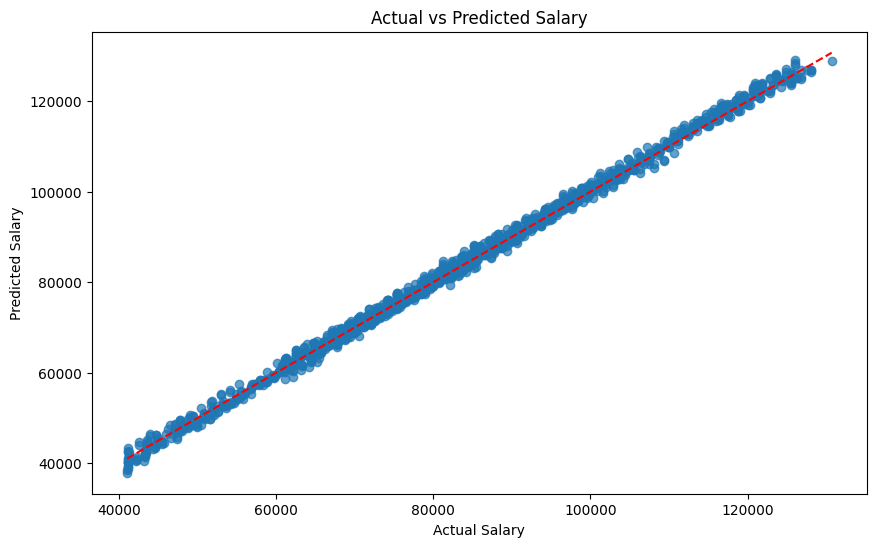

In [114]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.show()

In [115]:
random_model=RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
random_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [116]:
y_pred_random=random_model.predict(X_test)

In [117]:
mae = mean_absolute_error(y_test, y_pred_random)
mse = mean_squared_error(y_test, y_pred_random)

rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_random)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 429.6140287110056
Mean Squared Error (MSE): 461947.47988175915
Root Mean Squared Error (RMSE): 679.6671831725872
R-squared (R²): 0.9989549335000832


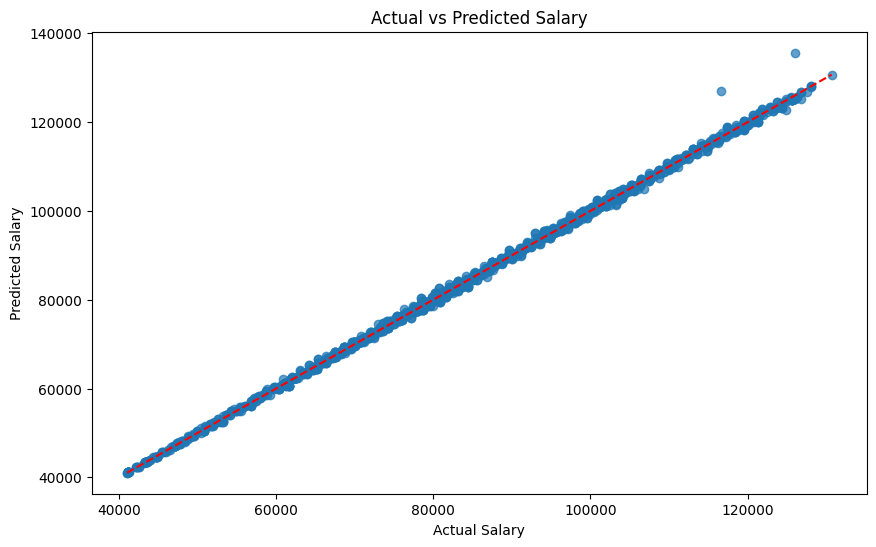

In [118]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_random, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.show()

In [119]:
decision_model=DecisionTreeRegressor(random_state=42)
decision_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [120]:
y_pred_decision=decision_model.predict(X_test)

In [121]:
# Assuming y_test and y_pred are defined
mae = mean_absolute_error(y_test, y_pred_decision)
mse = mean_squared_error(y_test, y_pred_decision)

rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_decision)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 30.530137981118372
Mean Squared Error (MSE): 46008.85984023239
Root Mean Squared Error (RMSE): 214.4967595098639
R-squared (R²): 0.9998959138858584


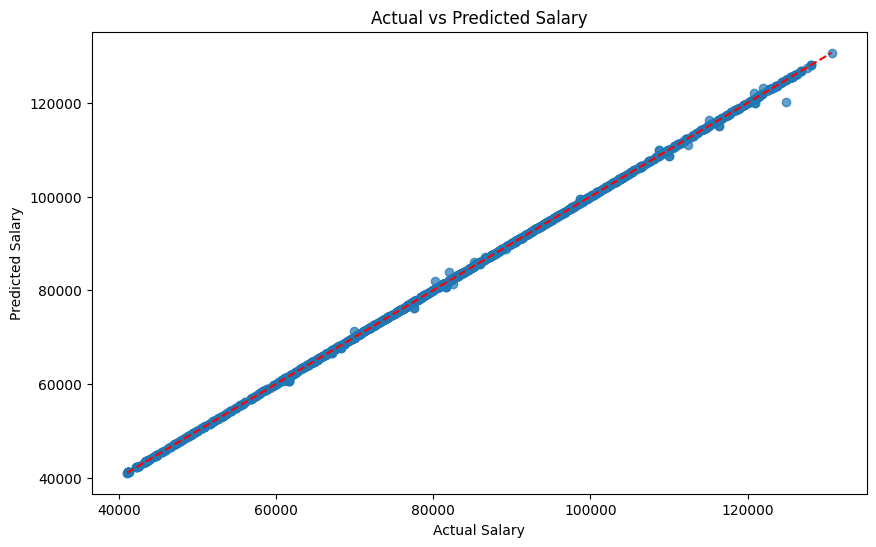

In [122]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_decision, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.show()

In [127]:
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(label_encoder, 'label_encoder.joblib')
joblib.dump(X.columns.tolist(), 'trained_columns.joblib')  
joblib.dump(decision_model, 'decision_tree_model.joblib')

['decision_tree_model.joblib']

In [129]:

def preprocess_input(data, scaler, label_encoder):
    
    # Encode Gender
    data['Gender'] = label_encoder.transform(data['Gender'])
    
    # Standardize Age and Years of Experience
    data[['Age', 'Years of Experience']] = scaler.transform(data[['Age', 'Years of Experience']])
    
    # One-hot encode 'Education Level' and 'Job Title' if required
    data = pd.get_dummies(data, columns=['Education Level', 'Job Title'], drop_first=False)
    
    # Ensure columns match the trained model (add missing columns)
    trained_columns = joblib.load('trained_columns.joblib')  # Load column names saved earlier
    for col in trained_columns:
        if col not in data.columns:
            data[col] = 0
    data = data[trained_columns]  # Reorder to match the trained model
    return data

# Function to predict salary
def predict_salary(input_data):
   
    # Load the saved model
    model = joblib.load('decision_tree_model.joblib')
    
    # Load pre-fitted scaler and label encoder
    scaler = joblib.load('scaler.joblib')
    label_encoder = joblib.load('label_encoder.joblib')
    
    # Convert input_data to DataFrame for preprocessing
    input_df = pd.DataFrame([input_data])
    
    # Preprocess the input data
    processed_data = preprocess_input(input_df, scaler, label_encoder)
    
    # Predict salary
    salary_prediction = model.predict(processed_data)
    return salary_prediction[0]

# Example usage
if __name__ == "__main__":
    # Example input features
    new_data = {
        'Age': 32,
        'Years of Experience': 10,
        'Gender': 'Male',
        'Education Level': 'Masters',
        'Job Title': 'Data Scientist'
    }
    
    predicted_salary = predict_salary(new_data)
    print(f"Predicted Salary: ${predicted_salary:.2f}")


Predicted Salary: $53000.00
